# UNDERSTANDING AI (771763_C24_T3A) ANALYSIS
# ANALYSIS OF SECOND HAND CAR SALES

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

## Data Cleaning and Preprocessing

### Load dataset

In [2]:
data = pd.read_csv('car_sales_data_24.csv', delimiter = ',')
data

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101
...,...,...,...,...,...,...,...
49995,BMW,M5,5.0,Petrol,2018,28664,113006
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
49998,Ford,Focus,1.0,Diesel,2016,26468,23630


In [3]:
data.columns

Index(['Manufacturer', 'Model', 'Engine size', 'Fuel type',
       'Year of manufacture', 'Mileage', 'Price'],
      dtype='object')

In [4]:
# clean column attritubes to be all lowercase
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns

Index(['manufacturer', 'model', 'engine_size', 'fuel_type',
       'year_of_manufacture', 'mileage', 'price'],
      dtype='object')

In [5]:
# check for null values
data.isnull().sum()

manufacturer           0
model                  0
engine_size            0
fuel_type              0
year_of_manufacture    0
mileage                0
price                  0
dtype: int64

In [6]:
# check data types
data.dtypes

manufacturer            object
model                   object
engine_size            float64
fuel_type               object
year_of_manufacture      int64
mileage                  int64
price                    int64
dtype: object

In [7]:
# Statistical description of numerical data types
data.describe().round(2)

,engine_size,year_of_manufacture,mileage,price
count,50000.00,50000.00,50000.00,50000.00
mean,1.77,2004.21,112497.32,13828.90
std,0.73,9.65,71632.52,16416.68
min,1.00,1984.00,630.00,76.00
25%,1.40,1996.00,54352.25,3060.75
50%,1.60,2004.00,100987.50,7971.50
75%,2.00,2012.00,158601.00,19026.50
max,5.00,2022.00,453537.00,168081.00


In [8]:
# Get unique attributes of data columns
attributes = ['manufacturer', 'model', 'fuel_type', 'engine_size']
for attribute in attributes:
    print(f'unique attributes in {attribute}: {data[attribute].unique()}\n')

unique attributes in manufacturer: ['Ford' 'Porsche' 'Toyota' 'VW' 'BMW']

unique attributes in model: ['Fiesta' '718 Cayman' 'Mondeo' 'RAV4' 'Polo' 'Focus' 'Prius' 'Golf' 'Z4'
 'Yaris' '911' 'Passat' 'M5' 'Cayenne' 'X3']

unique attributes in fuel_type: ['Petrol' 'Diesel' 'Hybrid']

unique attributes in engine_size: [1.  4.  1.6 1.8 1.4 1.2 2.  2.2 2.4 2.6 3.5 4.4 3.  5. ]



## Exploratory Data Analysis

### engine size vs price

Text(0.5, 1.0, 'Engine size vs Price')

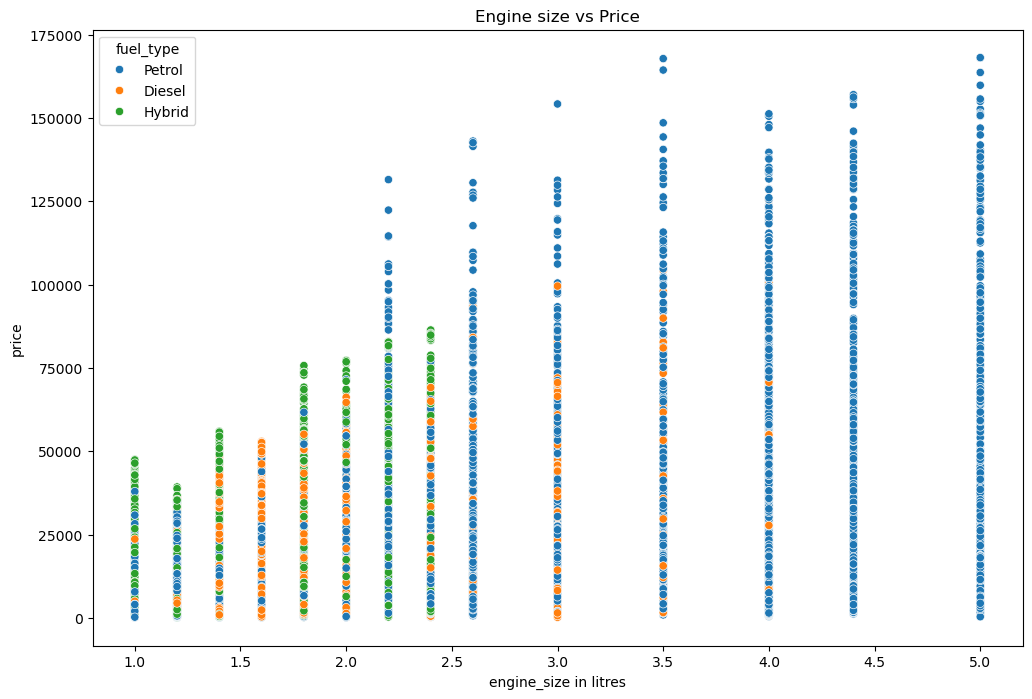

In [9]:
# engine size vs price
plt.figure(figsize=(12,8))
sns.scatterplot(x = data['engine_size'], y = data['price'], color = 'green', hue = data['fuel_type'])
plt.xlabel('engine_size in litres')
plt.ylabel('price')
plt.title('Engine size vs Price')

### year of manufacture vs price

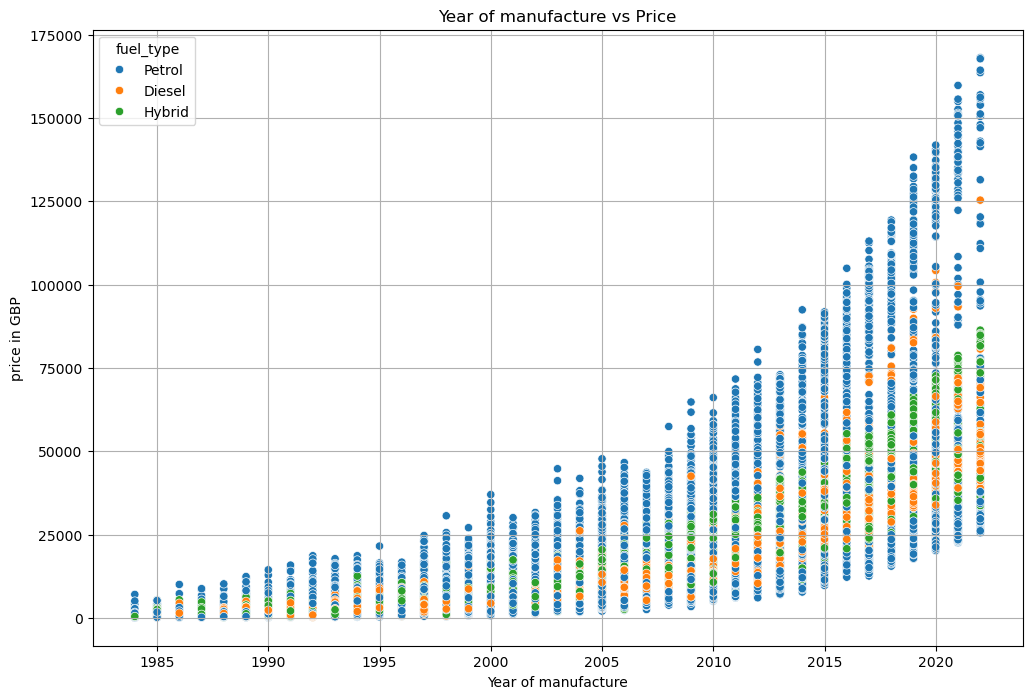

In [10]:
# Year of manufacture vs price
plt.figure(figsize=(12,8))
sns.scatterplot(x = data['year_of_manufacture'], y = data['price'], color = 'blue', hue = data['fuel_type'])
plt.xlabel('Year of manufacture')
plt.ylabel('price in GBP')
plt.title('Year of manufacture vs Price')
plt.grid(True)

### mileage vs price

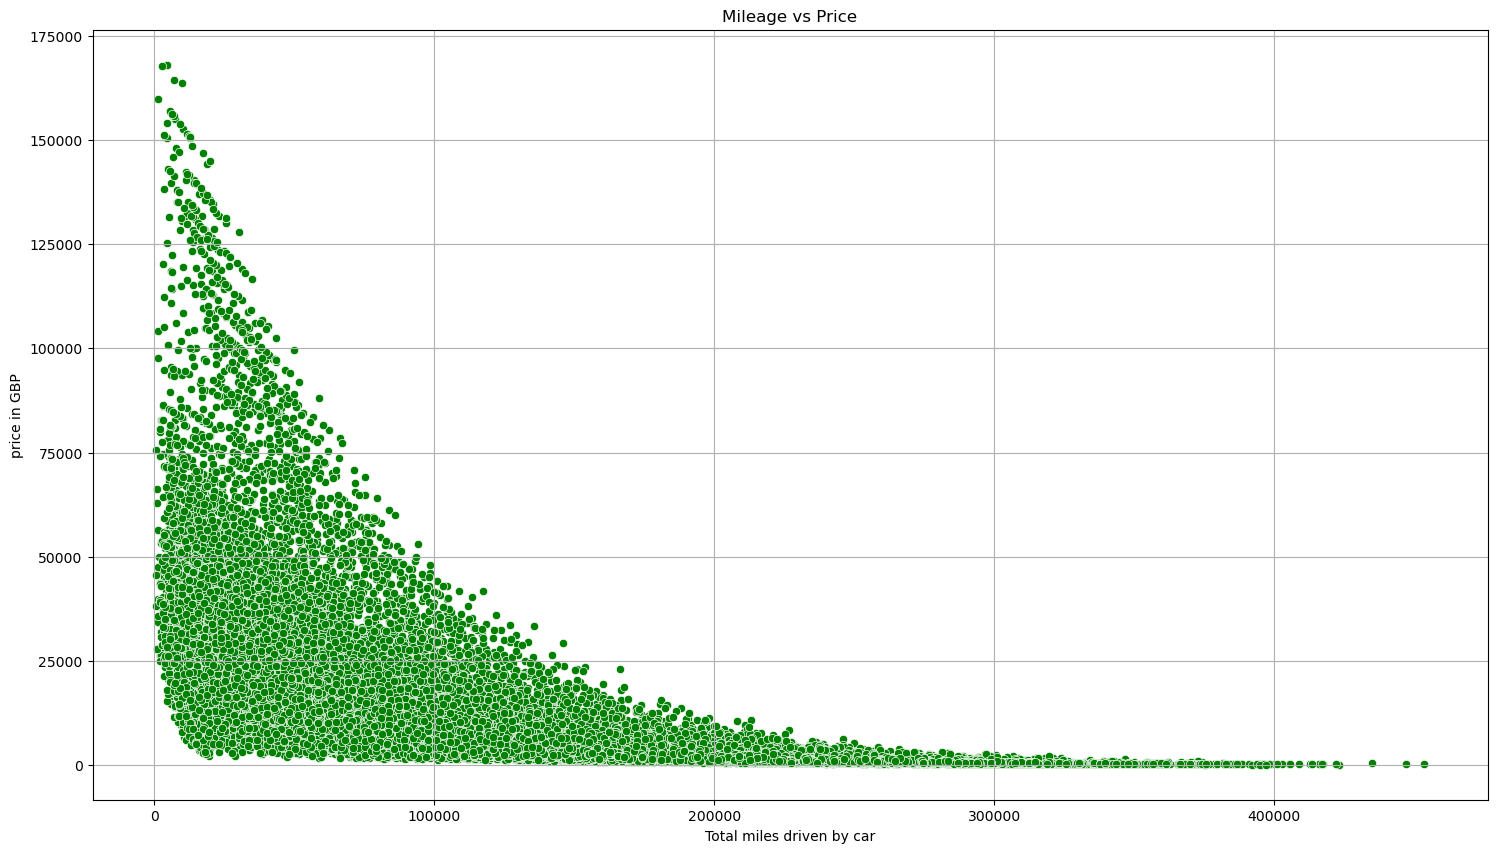

In [11]:
# Mileage vs price
plt.figure(figsize=(18,10))
sns.scatterplot(x = data['mileage'], y = data['price'], color = 'green')
plt.xlabel('Total miles driven by car')
plt.ylabel('price in GBP')
plt.title('Mileage vs Price')
plt.grid(True)

### engine type vs price

Text(0.5, 1.0, 'Fuel type vs Price')

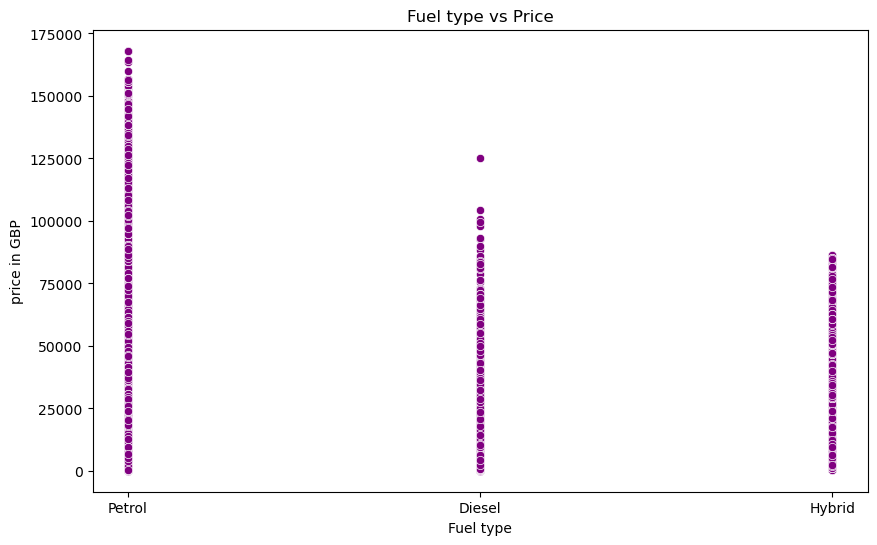

In [12]:
# engine type vs price
plt.figure(figsize=(10,6))
sns.scatterplot(x = data['fuel_type'], y = data['price'], color = 'purple')
plt.xlabel('Fuel type')
plt.ylabel('price in GBP')
plt.title('Fuel type vs Price')

### model vs price

Text(0.5, 1.0, 'model vs Price')

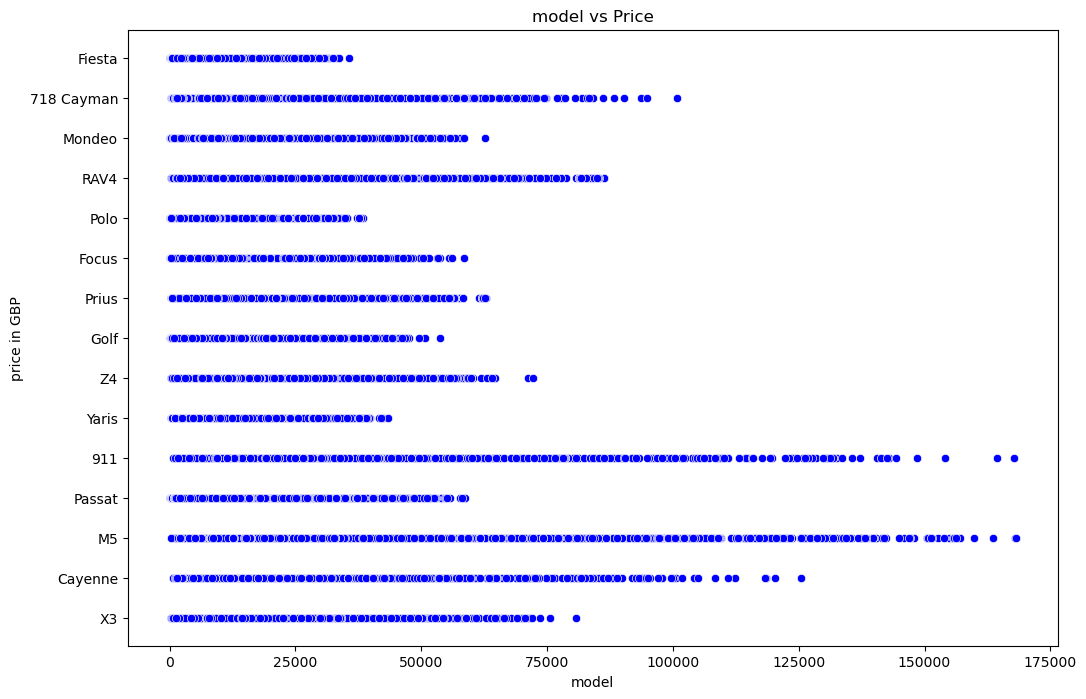

In [13]:
# model vs price
plt.figure(figsize=(12,8))
sns.scatterplot(x = data['price'], y = data['model'], color = 'blue')
plt.xlabel('model')
plt.ylabel('price in GBP')
plt.title('model vs Price')


### correlation between numerical variables

<Axes: >

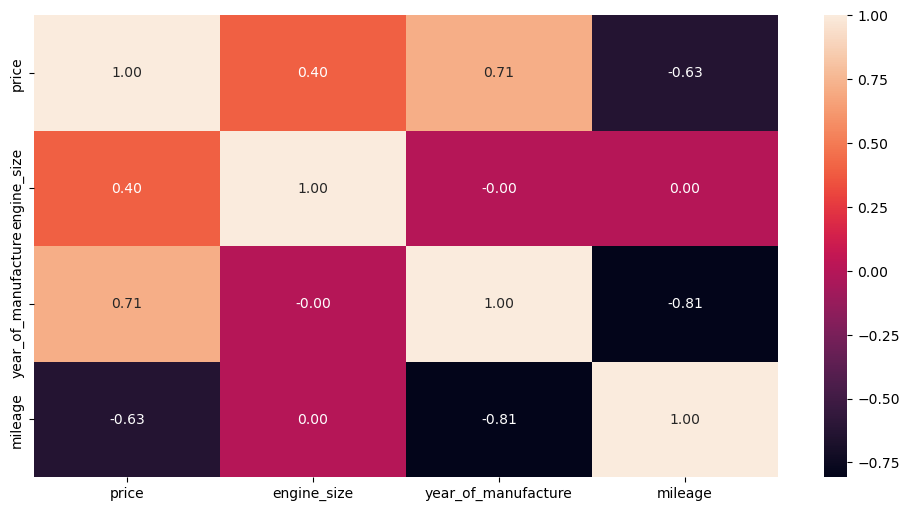

In [14]:
# checking correlation between numerical variables
plt.figure(figsize=(12,6))
numerical_features = ['price', 'engine_size','year_of_manufacture','mileage']
sns.heatmap(data[numerical_features].corr(), annot= True, fmt= '.2f')

# SUPERVISED LEARNING - REGRESSION MODELS TO PREDICT PRICE

## Regression of numerical input features

In [17]:
class Supervised:
    def __init__(self, feature, price):
        """
        Regression models to predict price of care sales
        Args:
            feature (Series): An input feature for prediction
            price(Series): The output feature to be predicted
        """
        self.feature = feature
        self.price = price
        
    def linear_reg(self):
        """
        To predict price of second hand car from 
        single input feature using linear regression
        Args:
            feature(Series): An input feature for prediction
        Returns:
            stats_report (DataFrame): Statistical table of evaluation metrics
        """
        x = np.array(self.feature).reshape(-1,1)
        y = self.price
        
        #prepare train and test data
        x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state= 42)
        # 20 % of the data is used for testing

        # Feature scaling
        scale = StandardScaler()
        scale.fit(x_train)
        x_train_scaled = scale.transform(x_train)
        x_test_scaled = scale.transform(x_test)

        # Build the model
        model = LinearRegression()
        model.fit(x_train_scaled, y_train)

        # Predict model
        y_pred = model.predict(x_test_scaled)
    
        #Parameters in linear fuctions
        w1 = model.coef_[0]
        c = model.intercept_
    
        #Evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        R2 = r2_score(y_test, y_pred)
    
        # Statistical report
        report = {}
        report['gradient'] = round(w1,2)
        report['intercept'] = round(c,2)
        report['MAE'] = round(mae,2)
        report['MSE'] = round(mse,2)
        report['RMSE'] = round(rmse,2)
        report['r2_score'] = round(R2,2)
    
        stats_report = pd.DataFrame(list(report.items()), columns = ['Metrics', 'value'])

        # Data Visualisation
        plt.figure(figsize=(14,8))
        sns.scatterplot(x = self.feature, y = y, color = 'grey')
        plt.plot(x_test,y_pred, color = 'green', label = 'line of best fit')
        plt.xlabel(self.feature.name)
        plt.ylabel('Price in GBP')
        plt.title(f'Plot for {self.feature.name} vs Price in car sales data 2024')
        plt.show()
    
        print(f'Statistical Report for {self.feature.name} vs Price in GBP')
        print('-------------------------------------------')
        return stats_report

    def poly_reg(self, degree):
        """
        To predict price of second hand car from 
        single input feature using polynomial regression
        Args:
            degree(int): the power of a polynomial equation
        Returns:
            stats_report (DataFrame): Statistical table of evaluation metrics
        """
        x = np.array(self.feature).reshape(-1,1)
        y = self.price
    
        #prepare train and test data
        x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state= 42)
        # 20 % of the data is used for testing
    
        # Feature scaling
        scale = StandardScaler()
        scale.fit(x_train)
        x_train_scaled = scale.transform(x_train)
        x_test_scaled = scale.transform(x_test)
    
        #Using polynomial features
        poly = PolynomialFeatures(degree= degree, include_bias= False)
        x_train_poly = poly.fit_transform(x_train_scaled)
        x_test_poly = poly.fit_transform(x_test_scaled)
    
        # Build the model
        model = LinearRegression()
        model.fit(x_train_poly, y_train)
    
        # Predict model
        y_pred = model.predict(x_test_poly)
    
        #Parameters in linear fuctions
        w = model.coef_ #coefficients
        c = model.intercept_ # intercept
    
        #Evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        R2 = r2_score(y_test, y_pred)
    
        # Statistical report
        report = {}
        report['gradient'] = np.round(w,2)
        report['intercept'] = round(c,2)
        report['MAE'] = round(mae,2)
        report['MSE'] = round(mse,2)
        report['RMSE'] = round(rmse,2)
        report['r2_score'] = round(R2,2)
    
        stats_report = pd.DataFrame(list(report.items()), columns = ['Metrics', 'value'])
    
        # Data Visualisation
        plt.figure(figsize=(14,10))
        sns.scatterplot(x = self.feature, y = y, color = 'green')
    
        #taking the first 1000 values of feature values for line of best fit
        x_fit = np.linspace(x.min(),x.max(), 5000).reshape(-1,1)
        x_fit_scaled = scale.transform(x_fit)
        x_fit_poly = poly.fit_transform(x_fit_scaled)
        y_fit = model.predict(x_fit_poly)
        plt.plot(x_fit, y_fit, label = 'line of best fit', color = 'red')
    
        plt.xlabel(self.feature.name)
        plt.ylabel('Price in GBP')
        plt.title(f'Year of manufacture vs Price in car sales data at degree = {degree}')
        plt.show()
    
        print(f'Statistical Report for Year of manufacture vs Price in GBP at degree = {degree}')
        print('-------------------------------------------')
        return stats_report

    def mult_reg(self):
        """
        predict price using multiple numerical features
        Args:
            feature(List): Multiple features for prediction
        Returns:
            stats_report (DataFrame): Statistical table of evaluation metrics
        """
        x = self.feature
        y = self.price
        
        #train_test_split
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
        
        scale = StandardScaler()
        scale.fit(x_train)
        x_train_scaled = scale.transform(x_train)
        x_test_scaled = scale.transform(x_test)
        
        model = LinearRegression()
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
        
        #Parameters in linear functions
        w1 = model.coef_[0] # weight of single output
        c = model.intercept_ # intercept
        
        #Evaluation Metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        R2 = r2_score(y_test, y_pred)
        
        # Statistical report
        report = {}
        report['gradient'] = round(w1,2)
        report['intercept'] = round(c,2)
        report['MAE'] = round(mae,2)
        report['MSE'] = round(mse,2)
        report['RMSE'] = round(rmse,2)
        report['r2_score'] = round(R2,2)
        
        stats_report = pd.DataFrame(list(report.items()), columns = ['Metrics', 'value'])
        
        # Data Visualisation
        plt.figure(figsize=(14,10))
        plt.scatter(y_test, y_pred)
        plt.plot([10000,150000], [10000,150000], 'k-')
        plt.xlabel('Actual price in GBP')
        plt.ylabel('Predicted price in GBP')
        plt.title(f'Mulitple linear regression plot')
        plt.xlim(10000,150000)
        plt.ylim(10000,150000)
        plt.show()
        
        
        print(f'Statistical Report for Multiple linear regression model')
        print('-------------------------------------------')
        return stats_report

    def rf_reg(self):
        """
        predict price using multiple numerical features using RandomForest regression model
        Args:
            feature(List): Multiple features for prediction
        Returns:
            stats_report (DataFrame): Statistical table of evaluation metrics
        """
        #train_test_split
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
        
        scale = StandardScaler()
        scale.fit(x_train)
        x_train_scaled = scale.transform(x_train)
        x_test_scaled = scale.transform(x_test)
        
        model = RandomForestRegressor()
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
        
        #Evaluation Metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        R2 = r2_score(y_test, y_pred)
        
        # Statistical report
        report = {}
        report['MAE'] = round(mae,2)
        report['MSE'] = round(mse,2)
        report['RMSE'] = round(rmse,3)
        report['r2_score'] = round(R2,3)
        
        stats_report = pd.DataFrame(list(report.items()), columns = ['Metrics', 'value'])
        
        # Data Visualisation
        plt.figure(figsize=(14,10))
        plt.scatter(y_test, y_pred)
        plt.plot([10000,150000], [10000,150000], 'k-')
        plt.xlabel('Actual price in GBP')
        plt.ylabel('Predicted price in GBP')
        plt.title(f'Randfom Forest regression plot')
        plt.xlim(10000,150000)
        plt.ylim(10000,150000)
        plt.show()
        
        print(f'Statistical Report for Random Forest regression model')
        print('-------------------------------------------')
        return stats_report
            

## Linear Regression based on single input feature

### engine size vs price

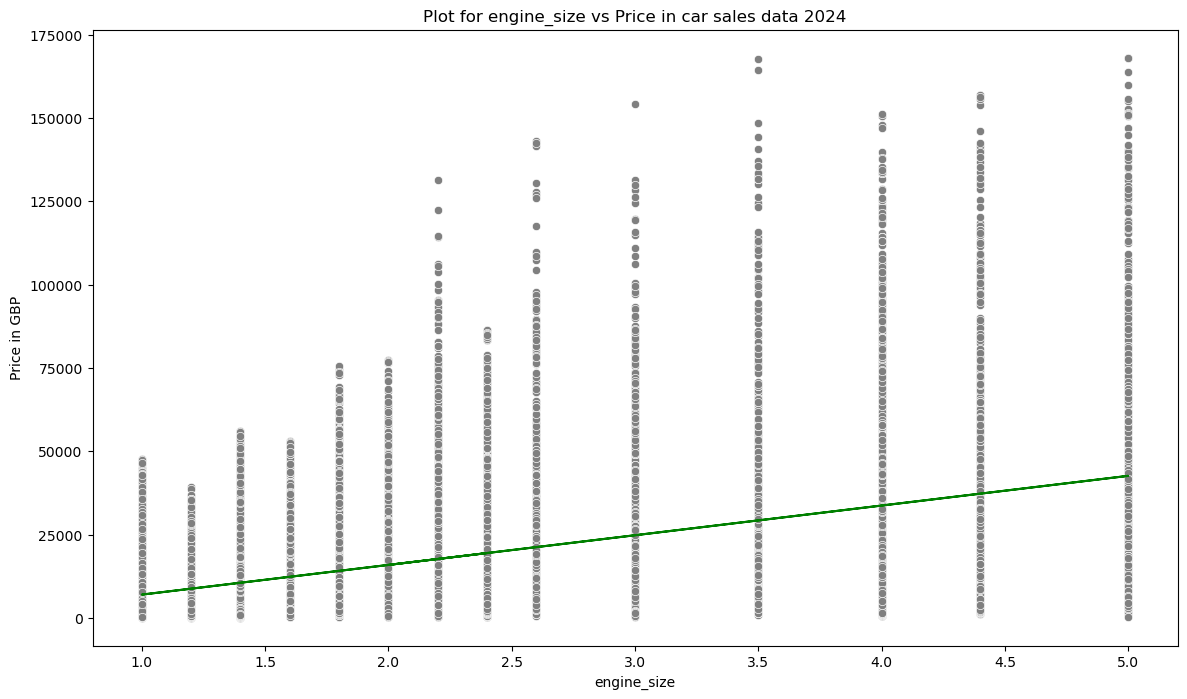

Statistical Report for engine_size vs Price in GBP
-------------------------------------------


,Metrics,value
0,gradient,6.575660e+03
1,intercept,1.385463e+04
2,MAE,1.081749e+04
3,MSE,2.304992e+08
4,RMSE,1.518220e+04
5,r2_score,1.500000e-01


In [45]:
input_engine_size = Supervised(data['engine_size'], data['price'])
input_engine_size.linear_reg()

### year of manufacture vs price

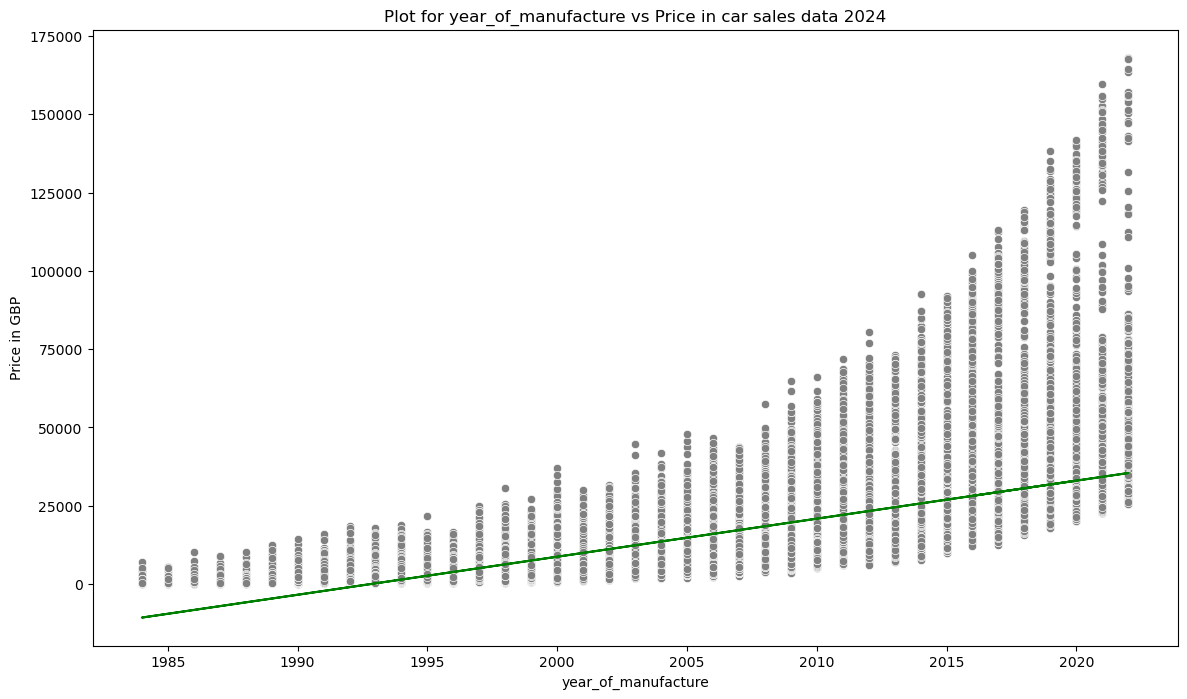

Statistical Report for year_of_manufacture vs Price in GBP
-------------------------------------------


,Metrics,value
0,gradient,1.171162e+04
1,intercept,1.385463e+04
2,MAE,7.031040e+03
3,MSE,1.326790e+08
4,RMSE,1.151864e+04
5,r2_score,5.100000e-01


In [44]:
input_year = Supervised(data['year_of_manufacture'], data['price'])
input_year.linear_reg()

### mileage vs price

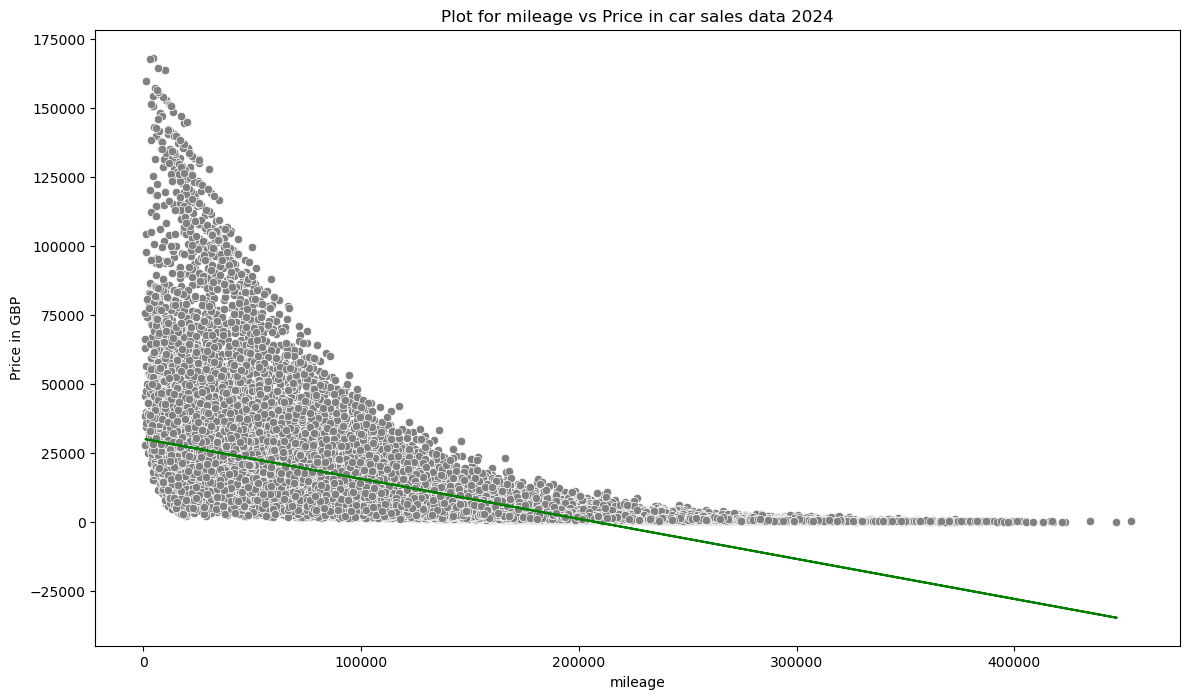

Statistical Report for mileage vs Price in GBP
-------------------------------------------


,Metrics,value
0,gradient,-1.037408e+04
1,intercept,1.385463e+04
2,MAE,7.964780e+03
3,MSE,1.624686e+08
4,RMSE,1.274632e+04
5,r2_score,4.000000e-01


In [43]:
input_mileage = Supervised(data['mileage'], data['price'])
input_mileage.linear_reg()

## Polynomial Regression based on single input feature

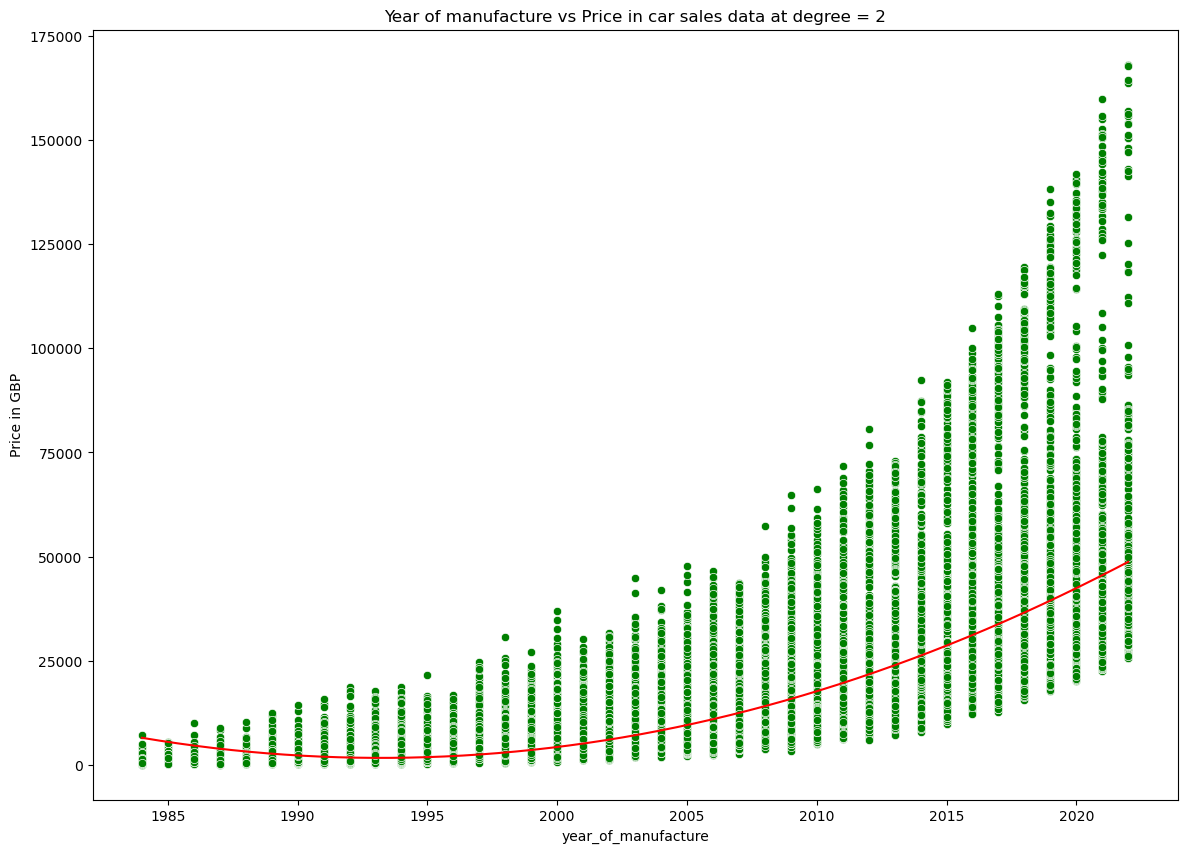

Statistical Report for Year of manufacture vs Price in GBP at degree = 2
-------------------------------------------
     Metrics               value
0   gradient  [12065.81, 5281.9]
1  intercept             8572.73
2        MAE             5387.11
3        MSE         105993894.2
4       RMSE            10295.33
5   r2_score                0.61




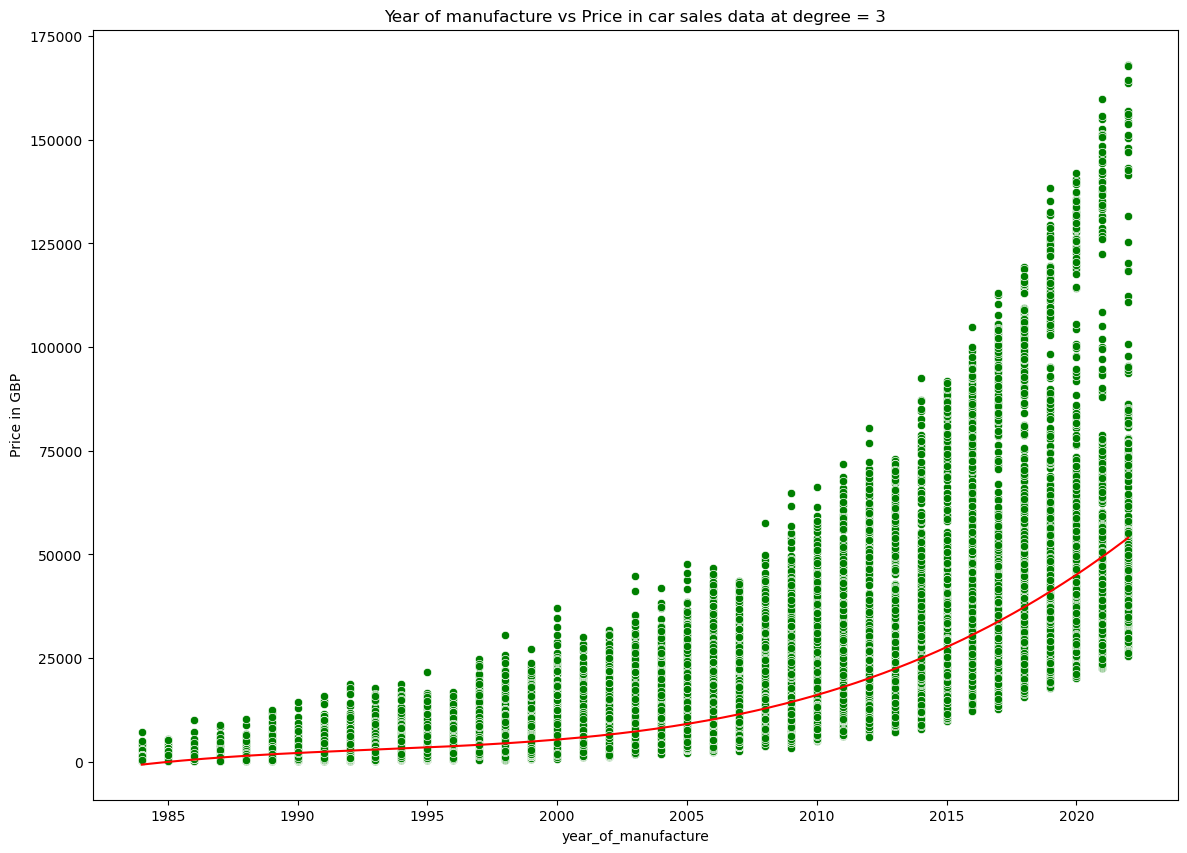

Statistical Report for Year of manufacture vs Price in GBP at degree = 3
-------------------------------------------
     Metrics                        value
0   gradient  [9001.14, 5606.25, 1605.86]
1  intercept                      8356.06
2        MAE                      5186.87
3        MSE                 103043508.15
4       RMSE                     10151.03
5   r2_score                         0.62




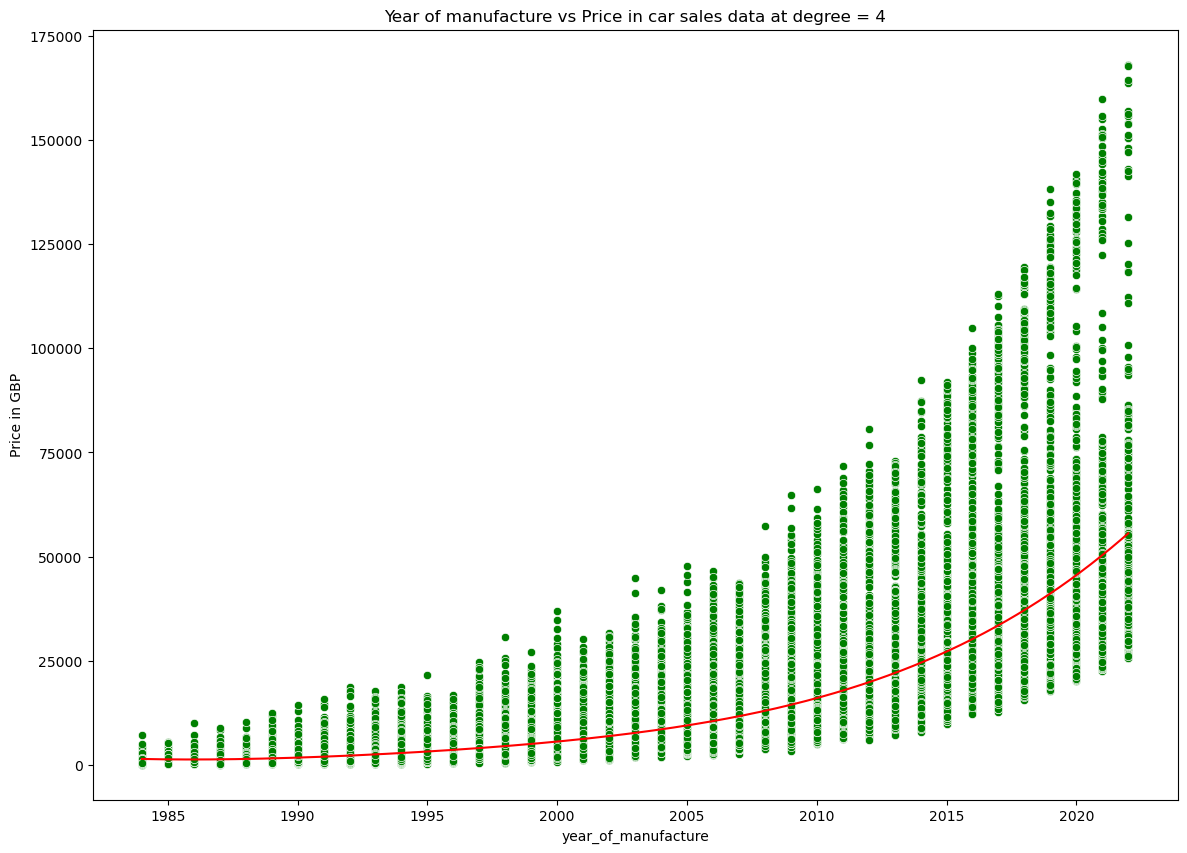

Statistical Report for Year of manufacture vs Price in GBP at degree = 4
-------------------------------------------
     Metrics                                value
0   gradient  [8812.98, 4490.59, 1741.59, 386.93]
1  intercept                              8737.14
2        MAE                              5162.88
3        MSE                         102720854.73
4       RMSE                             10135.13
5   r2_score                                 0.62




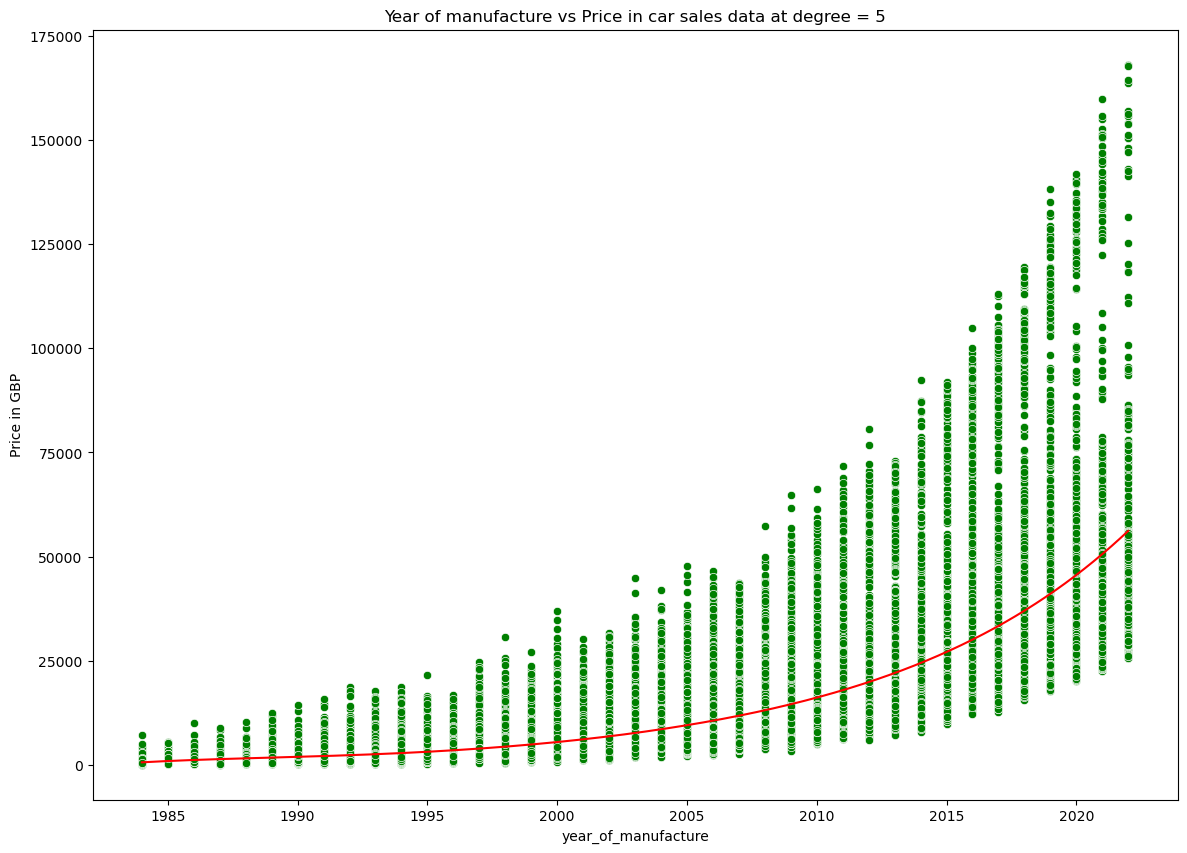

Statistical Report for Year of manufacture vs Price in GBP at degree = 5
-------------------------------------------
     Metrics                                        value
0   gradient  [9192.37, 4355.66, 1234.27, 448.12, 130.95]
1  intercept                                      8770.39
2        MAE                                      5160.77
3        MSE                                 102654671.47
4       RMSE                                     10131.86
5   r2_score                                         0.62




In [42]:
degrees = [2,3,4,5]
for degree in degrees:
    poly_year = Supervised(data['year_of_manufacture'], data['price'])
    stats_report = poly_year.poly_reg(degree=degree)
    print(stats_report)
    print('\n')

## Regression models of multiple features

### Using Linear Regression model

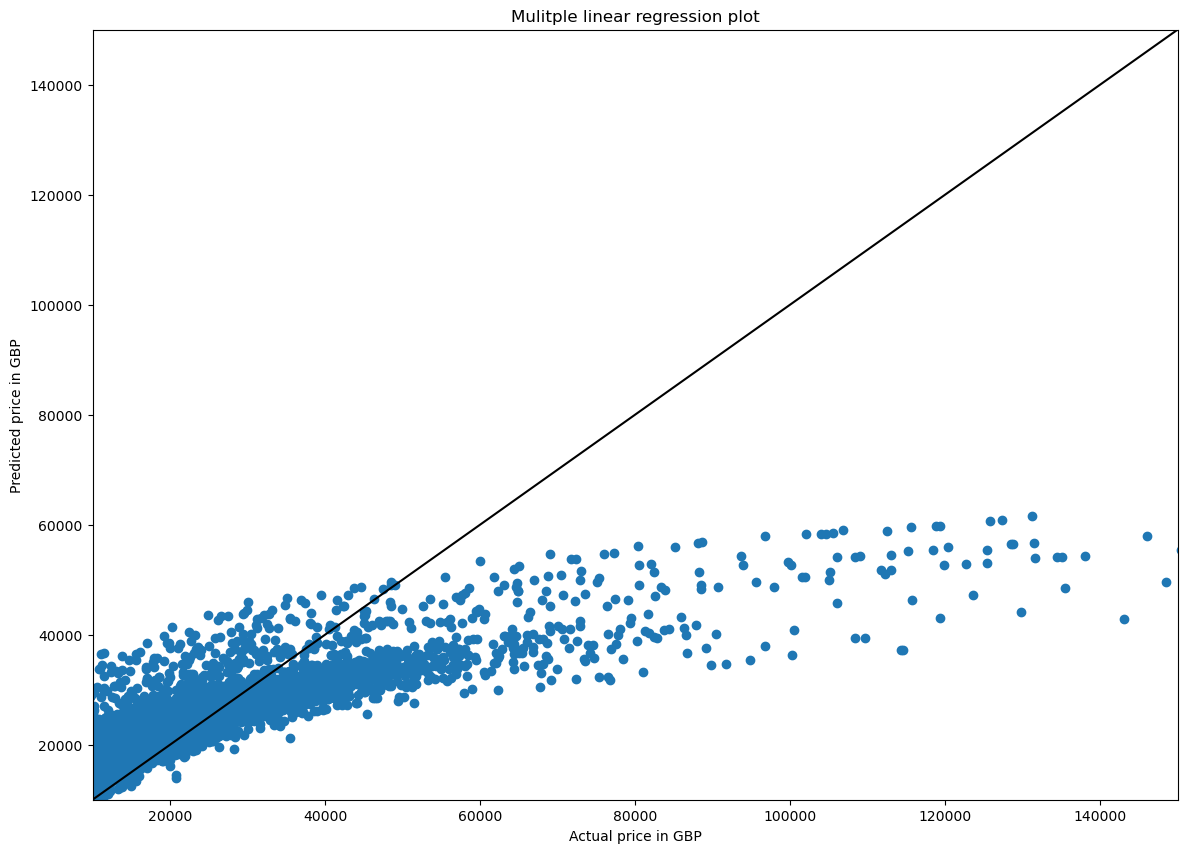

Statistical Report for Multiple linear regression model
-------------------------------------------


,Metrics,value
0,gradient,6594.02
1,intercept,13854.63
2,MAE,6091.46
3,MSE,89158615.76
4,RMSE,9442.38
5,r2_score,0.67


In [47]:
input_features = ['engine_size', 'year_of_manufacture', 'mileage']
x = data[input_features]
y = data['price']
input_multiple = Supervised(x,y)
input_multiple.mult_reg()

### Using RandomForest Regression model

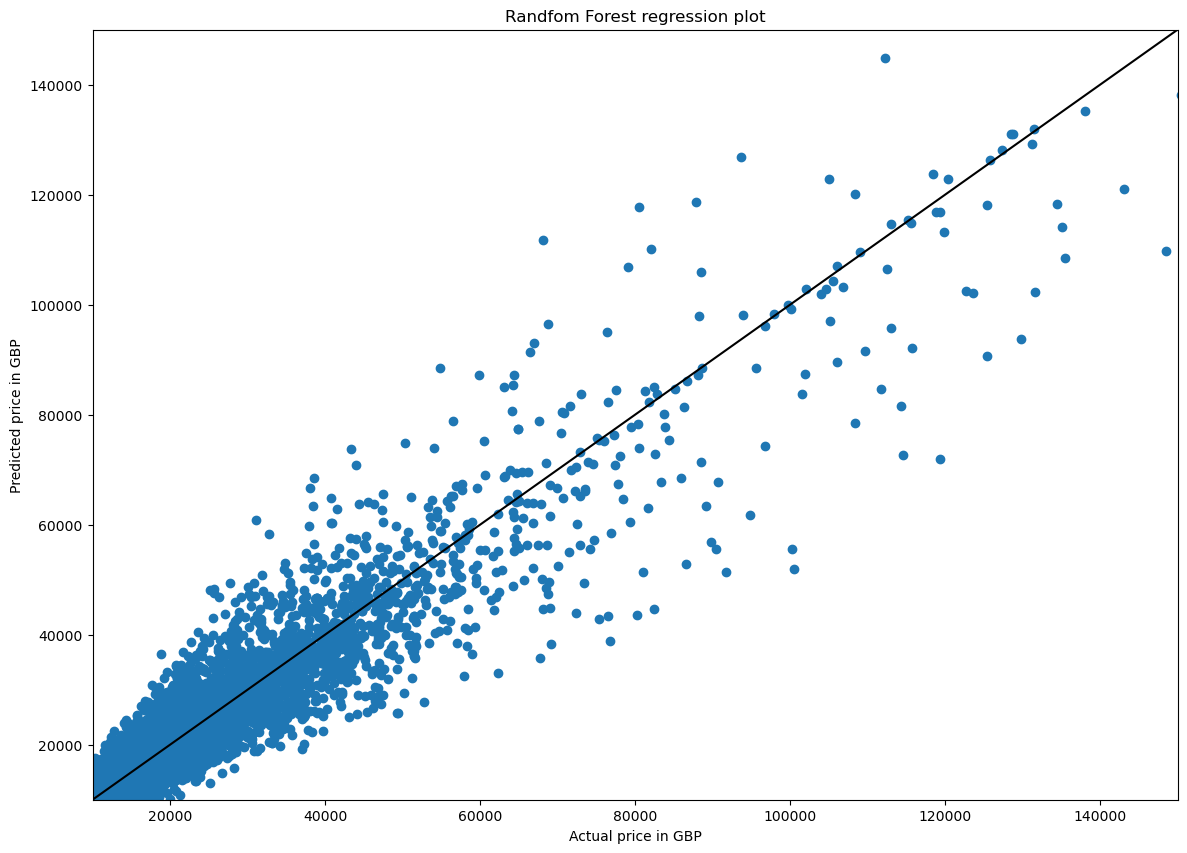

Statistical Report for Random Forest regression model
-------------------------------------------


,Metrics,value
0,MAE,2.297150e+03
1,MSE,2.025580e+07
2,RMSE,4.500644e+03
3,r2_score,9.250000e-01


In [52]:
input_features = ['engine_size', 'year_of_manufacture', 'mileage']
x = data[input_features]
y = data['price']
input_multiple = Supervised(x,y)
input_multiple.rf_reg()

## RandomForest Regression model for (Categorical + Numerical Features) price prediction

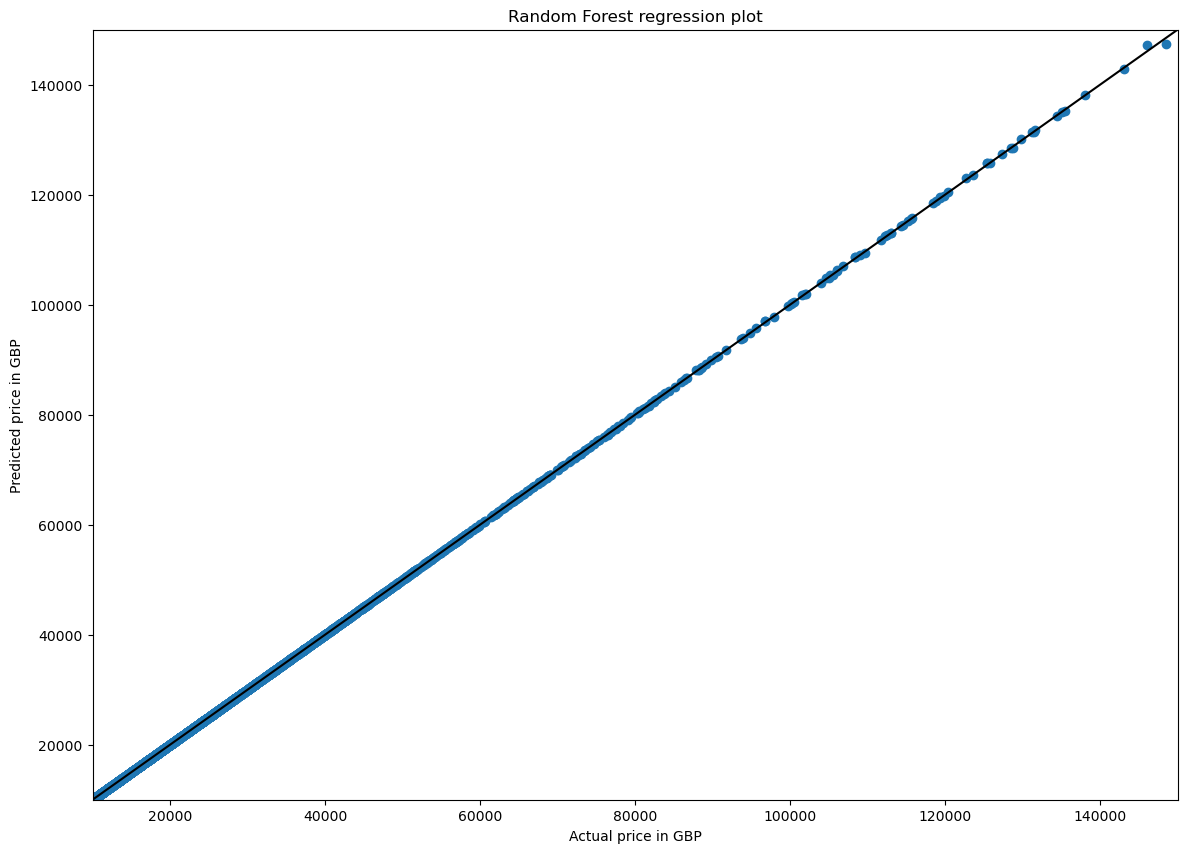

Statistical Report for both numerical and categorical features using Random Forest regression model
-------------------------------------------
    Metrics     value
0       MAE     3.130
1       MSE  1848.870
2      RMSE    42.998
3  r2_score     1.000


In [19]:
# Encoding categorical features
categorical_features = ['manufacturer', 'model', 'fuel_type']
encoder = OneHotEncoder(sparse_output = False)
x_encode = encoder.fit_transform(data[categorical_features])

# Standardisation of numerical features
scale = StandardScaler()
x_scaled = scale.fit_transform(data[numerical_features])

# combine both features
x_encode_data = pd.DataFrame(x_encode, columns = encoder.get_feature_names_out(categorical_features))
x_scaled_data = pd.DataFrame(x_scaled, columns = numerical_features)
x_combined = pd.concat([x_scaled_data.reset_index(drop=True), x_encode_data.reset_index(drop=True)], axis =1)
y = data['price']

#split into train and test data
x_train, x_test, y_train, y_test = train_test_split(x_combined, y, test_size= 0.2, random_state= 42)

# Train RandomForest model
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test, y_pred)

# Statistical report
report = {}
report['MAE'] = round(mae,2)
report['MSE'] = round(mse,2)
report['RMSE'] = round(rmse,3)
report['r2_score'] = round(R2,3)

stats_report = pd.DataFrame(list(report.items()), columns = ['Metrics', 'value'])

# Data Visualisation
plt.figure(figsize=(14,10))
plt.scatter(y_test, y_pred)
plt.plot([10000,150000], [10000,150000], 'k-')
plt.xlabel('Actual price in GBP')
plt.ylabel('Predicted price in GBP')
plt.title(f'Random Forest regression plot')
plt.xlim(10000,150000)
plt.ylim(10000,150000)
plt.show()

print(f'Statistical Report for both numerical and categorical features using Random Forest regression model')
print('-------------------------------------------')
print(stats_report)

## Artificial Neural Network (ANN) model for Price prediction

In [64]:
# Encoding categorical features
categorical_features = ['manufacturer', 'model', 'fuel_type']
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
x_encode = encoder.fit_transform(data[categorical_features])

# Standardisation of numerical features
scale = MinMaxScaler()
x_scaled = scale.fit_transform(data[numerical_features])

# combine both features
x_encode_data = pd.DataFrame(x_encode, columns = encoder.get_feature_names_out(categorical_features))
x_scaled_data = pd.DataFrame(x_scaled, columns = numerical_features)
x_combined = pd.concat([x_scaled_data.reset_index(drop=True), x_encode_data.reset_index(drop=True)], axis =1)

x_combined


,price,engine_size,year_of_manufacture,mileage,manufacturer_BMW,manufacturer_Ford,manufacturer_Porsche,manufacturer_Toyota,manufacturer_VW,model_718 Cayman,...,model_Passat,model_Polo,model_Prius,model_RAV4,model_X3,model_Yaris,model_Z4,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Petrol
0,0.017845,0.00,0.473684,0.279682,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.295396,0.75,0.842105,0.126339,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.142829,0.15,0.789474,0.085139,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.009696,0.20,0.105263,0.464078,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.023958,0.00,0.578947,0.280938,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.672182,1.00,0.894737,0.061898,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49996,0.055677,0.20,0.500000,0.230710,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49997,0.296277,0.15,1.000000,0.007507,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
49998,0.140198,0.00,0.842105,0.057049,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [65]:
#split into train and test data
x_train, x_test, y_train, y_test = train_test_split(x_combined, y, test_size= 0.2, random_state= 42)
x_train.shape, x_test.shape

((40000, 27), (10000, 27))

### Hyperparameter Tuning 

C:\Users\SOOQ ELASER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 237505328.0000 - mean_squared_error: 237505328.0000 - val_loss: 3881875.5000 - val_mean_squared_error: 3881875.5000
Epoch 2/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 7026285.5000 - mean_squared_error: 7026285.5000 - val_loss: 712091.8125 - val_mean_squared_error: 712091.8125
Epoch 3/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 4579069.5000 - mean_squared_error: 4579069.5000 - val_loss: 379596.0625 - val_mean_squared_error: 379596.0625
Epoch 4/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4302394.5000 - mean_squared_error: 4302394.5000 - val_loss: 443588.5000 - val_mean_squared_error: 443588.5000
Epoch 5/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 4265583.0000 - mean_squared_error: 4265583.0000 - val_loss: 259378.3594 - val_mean_squared_error: 259378.3594
Epoch 6/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 4116189.2500 - mean_squared_error: 4116189.2500 - val_loss: 106466.992

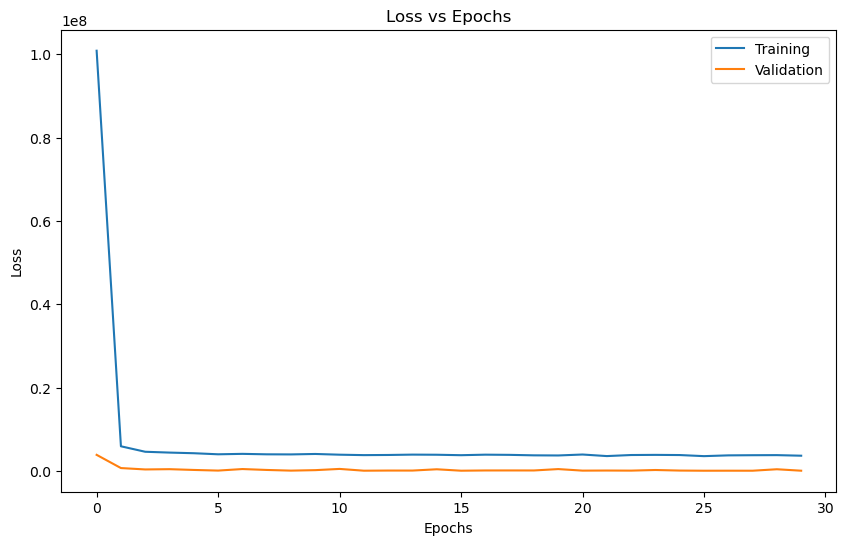

   learning rate    RMSE
0          0.001  277.06




C:\Users\SOOQ ELASER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 85737208.0000 - mean_squared_error: 85737208.0000 - val_loss: 476687.6562 - val_mean_squared_error: 476687.6562
Epoch 2/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 4941108.5000 - mean_squared_error: 4941108.5000 - val_loss: 777238.5625 - val_mean_squared_error: 777238.5625
Epoch 3/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 4582933.0000 - mean_squared_error: 4582933.0000 - val_loss: 553972.3750 - val_mean_squared_error: 553972.3750
Epoch 4/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4610599.5000 - mean_squared_error: 4610599.5000 - val_loss: 406434.6562 - val_mean_squared_error: 406434.6562
Epoch 5/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 5105152.0000 - mean_squared_error: 5105152.0000 - val_loss: 741323.8750 - val_mean_squared_error: 741323.8750
Epoch 6/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 4722017.5000 - mean_squared_error: 4722017.5000 - val_loss: 3765141.5000 

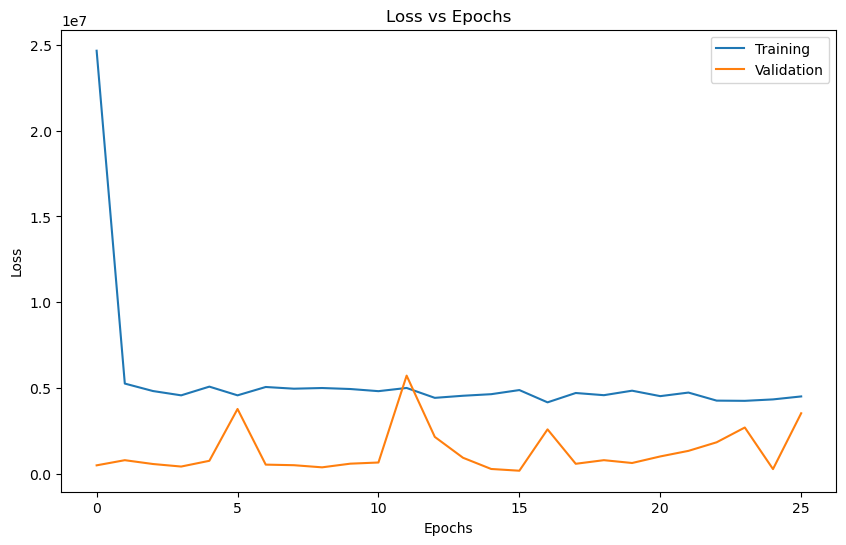

   learning rate    RMSE
0           0.01  403.78




C:\Users\SOOQ ELASER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 32270606.0000 - mean_squared_error: 32270606.0000 - val_loss: 11159450.0000 - val_mean_squared_error: 11159450.0000
Epoch 2/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 14550295.0000 - mean_squared_error: 14550295.0000 - val_loss: 1246213.5000 - val_mean_squared_error: 1246213.5000
Epoch 3/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 12912929.0000 - mean_squared_error: 12912929.0000 - val_loss: 1213452.8750 - val_mean_squared_error: 1213452.8750
Epoch 4/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 10215334.0000 - mean_squared_error: 10215334.0000 - val_loss: 2682385.0000 - val_mean_squared_error: 2682385.0000
Epoch 5/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 10333148.0000 - mean_squared_error: 10333148.0000 - val_loss: 10988292.0000 - val_mean_squared_error: 10988292.0000
Epoch 6/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 11468434.0000 - mean_squared_error: 11468434.0000 - va

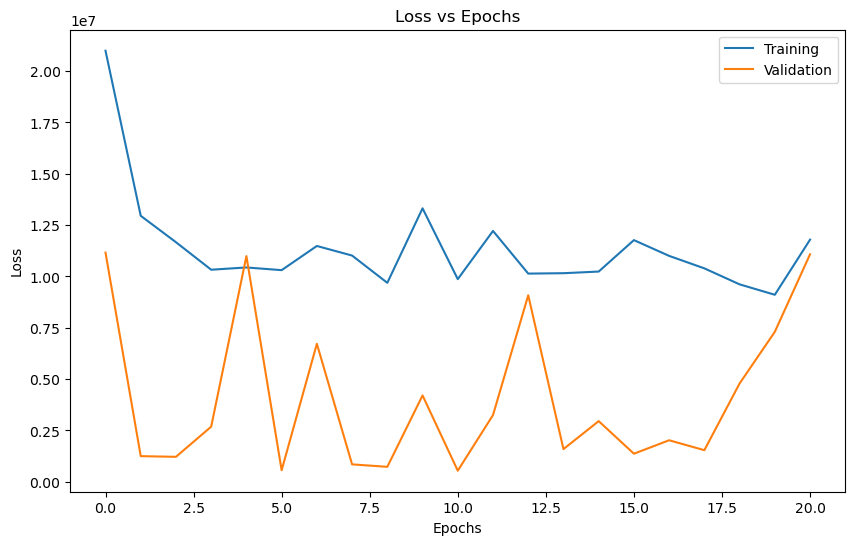

   learning rate    RMSE
0            0.1  729.45




In [71]:
# Hyperparameter tuning
learning_rate = [0.001, 0.01, 0.1]

for lr in learning_rate:
    model = Sequential()
    model.add(Dense(units = 64, input_dim= x_train.shape[1], activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units = 64, activation = 'relu')) # second layer
    model.add(Dropout(0.2))
    model.add(Dense(units = 64, activation= 'relu')) #third layer
    model.add(Dense(units = 1, activation = 'linear')) #output layer

    #compile model
    adam_optimiser = Adam(learning_rate = lr)
    model.compile(optimizer= adam_optimiser, 
                  loss = 'mean_squared_error', 
                  metrics= ['mean_squared_error'])
    early_stopping = EarlyStopping(monitor= 'val_loss', 
                                   patience= 10, 
                                   restore_best_weights= True)
    
    # fit model
    history = model.fit(x = x_train, y = y_train, 
                        batch_size = 32, 
                        epochs= 30, 
                        verbose = 'auto', 
                        validation_split = 0.2, 
                        callbacks= [early_stopping])
    
    #predict model
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)

    history_data = pd.DataFrame(history.history) 

    plt.figure(figsize=(10,6))
    plt.plot(history_data["loss"], label = "Training") 
    plt.plot(history_data["val_loss"], label = "Validation")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epochs')
    plt.legend()
    plt.show()

    evaluation_report = pd.DataFrame({'learning rate': [lr],
                                      'RMSE': round(rmse,2)
                                     })
    print(evaluation_report)
    print('\n')


# UNSUPERVISED LEARNING - CLUSTERING ALGORITHMS

## k_Means CLusterinng

### year vs price

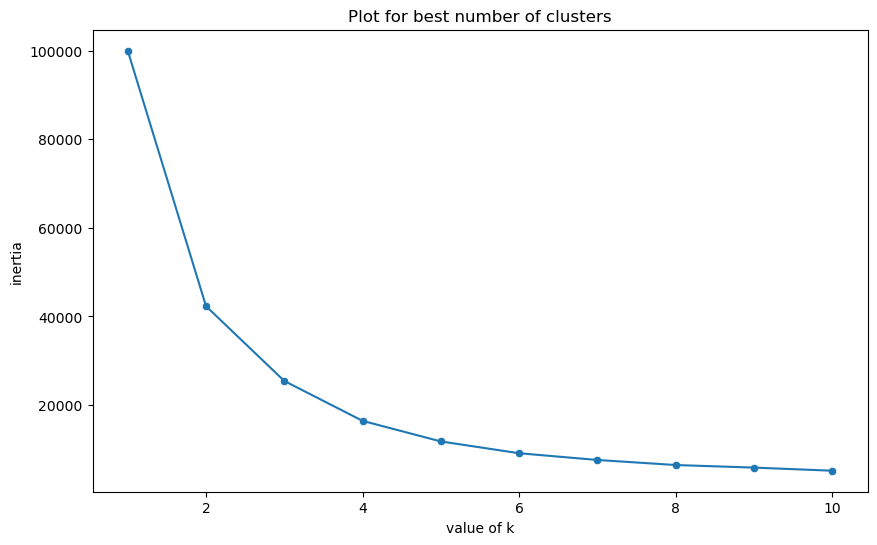

In [72]:
k_data = data[['year_of_manufacture', 'price']]

scale = StandardScaler()
scale.fit(k_data)
k_scaled_yp = scale.transform(k_data)

#Building the clustering using elbow method
k_values = [1,2,3,4,5,6,7,8,9,10]
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters= k, random_state= 42)
    kmeans.fit(k_scaled_yp)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

#plot to find elbow
plt.figure(figsize=(10,6))
sns.scatterplot(x= k_values, y= inertia_values)
sns.lineplot(x= k_values, y= inertia_values)
plt.title('Plot for best number of clusters')
plt.xlabel('value of k')
plt.ylabel('inertia')
plt.show()

In [73]:
# fit the Optimal k value
k = 2
kmeans = KMeans(n_clusters= k, random_state= 42)
kmeans.fit(k_scaled_yp)
y_pred_yp = kmeans.predict(k_scaled_yp)

### mileage vs price

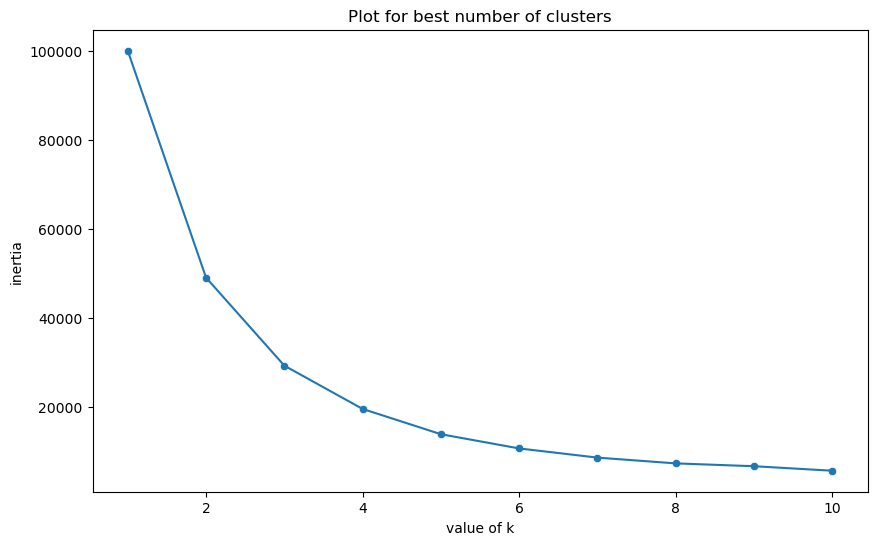

In [74]:
k_data = data[['mileage', 'price']]

scale = StandardScaler()
scale.fit(k_data)
k_scaled_mp = scale.transform(k_data)

#Building the clustering using elbow method
k_values = [1,2,3,4,5,6,7,8,9,10]
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters= k, random_state= 42)
    kmeans.fit(k_scaled_mp)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

#plot to find elbow
plt.figure(figsize=(10,6))
sns.scatterplot(x= k_values, y= inertia_values)
sns.lineplot(x= k_values, y= inertia_values)
plt.title('Plot for best number of clusters')
plt.xlabel('value of k')
plt.ylabel('inertia')
plt.show()

In [75]:
# fit the Optimal k value
k = 2
kmeans = KMeans(n_clusters= k, random_state= 42)
kmeans.fit(k_scaled_mp)
y_pred_mp = kmeans.predict(k_scaled_mp)

### engine size vs price

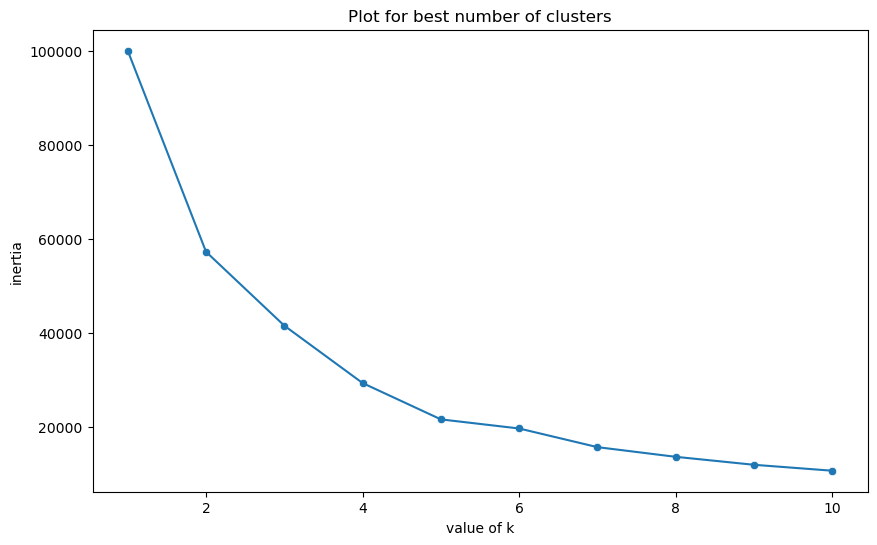

In [76]:
k_data = data[['engine_size', 'price']]

scale = StandardScaler()
scale.fit(k_data)
k_scaled_ep = scale.transform(k_data)

#Building the clustering using elbow method
k_values = [1,2,3,4,5,6,7,8,9,10]
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters= k, random_state= 42)
    kmeans.fit(k_scaled_ep)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

#plot to find elbow
plt.figure(figsize=(10,6))
sns.scatterplot(x= k_values, y= inertia_values)
sns.lineplot(x= k_values, y= inertia_values)
plt.title('Plot for best number of clusters')
plt.xlabel('value of k')
plt.ylabel('inertia')
plt.show()

In [77]:
# fit the Optimal k value
k = 5
kmeans = KMeans(n_clusters= k, random_state= 42)
kmeans.fit(k_scaled_ep)
y_pred_ep = kmeans.predict(k_scaled_ep)

### Clustering Evaluation Performance

In [78]:
def clustering_metrics(y_actual, y_predict):
    #calculating davies bouldin, silhouette coefficient and calinski harabasz score
    db_score = davies_bouldin_score(y_actual,y_predict).round(3)
    s_score = silhouette_score(y_actual,y_predict).round(3)
    ch_score = calinski_harabasz_score(y_actual,y_predict).round(3)
    report = pd.DataFrame({'davies_bouldin_score': [db_score],
                            'silhouette_score': [s_score],
                            'calinski_harabasz_score': [ch_score]})
    return report

### Evaluation performance (year vs price)

In [79]:
clustering_metrics(k_scaled_yp, y_pred_yp)

,davies_bouldin_score,silhouette_score,calinski_harabasz_score
0,0.678,0.548,68201.171


### Evaluation performance (mileage vs price)

In [80]:
clustering_metrics(k_scaled_mp, y_pred_mp)

,davies_bouldin_score,silhouette_score,calinski_harabasz_score
0,0.76,0.488,51833.442


### Evaluation performance (engine size vs price)

In [81]:
clustering_metrics(k_scaled_ep, y_pred_ep)

,davies_bouldin_score,silhouette_score,calinski_harabasz_score
0,0.755,0.432,45180.342


### Plot for best numerical feature combination using k-Means

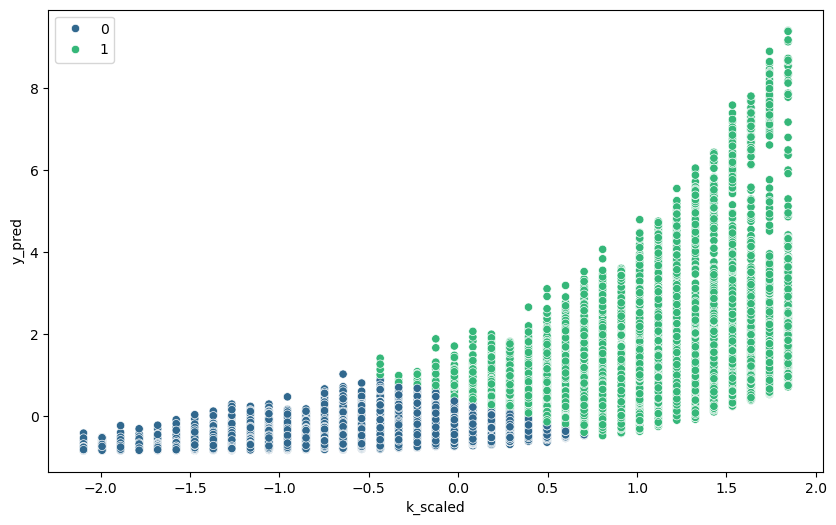

In [82]:
# Best combination: year vs price
k_data = pd.DataFrame(k_scaled_yp, y_pred_yp, columns = ['k_scaled', 'y_pred'])
plt.figure(figsize = (10,6))
sns.scatterplot(data = k_data, x = 'k_scaled', y= 'y_pred', hue = y_pred_yp, palette = 'viridis')
plt.show()

## Comparison with other clustering model

### DBSCAN – Life Expectancy versus GDP

In [87]:
k_data = data[['year_of_manufacture', 'price']]

scale = StandardScaler()
scale.fit(k_data)
k_scaled_yp = scale.transform(k_data)

dbscan = DBSCAN(eps= 0.2, min_samples = 3)
dbscan_pred = dbscan.fit_predict(k_scaled_yp)
dbscan_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
# calling evaluation function
clustering_metrics(k_scaled_yp, dbscan_pred)

,davies_bouldin_score,silhouette_score,calinski_harabasz_score
0,1.495,0.676,96.748


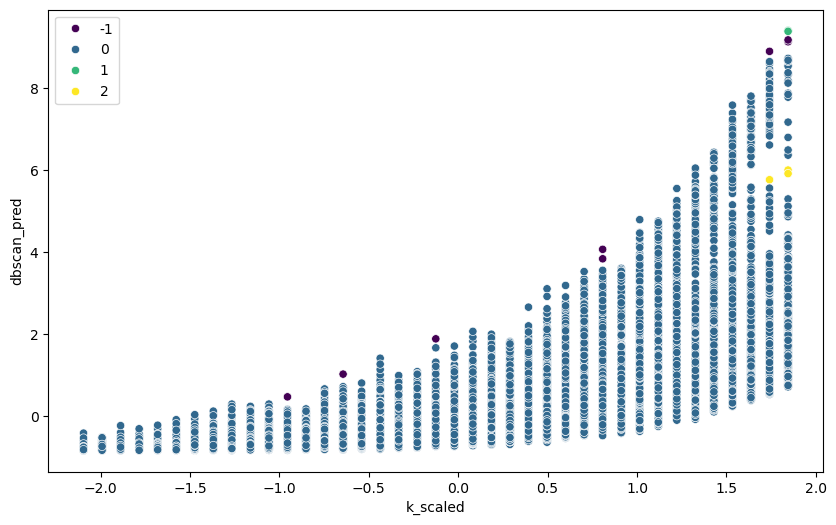

In [89]:
# visual presentation of Agglomerative clustering
k_data = pd.DataFrame(k_scaled_yp, dbscan_pred, columns = ['k_scaled', 'dbscan_pred'])
plt.figure(figsize = (10,6))
sns.scatterplot(data = k_data, x = 'k_scaled', y= 'dbscan_pred', hue = dbscan_pred, palette = 'viridis')
plt.show()